# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 586kB/s]
100% 235k/235k [00:00<00:00, 586kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'])

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [5]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
19999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [6]:
df.sample(8)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
8821,6010.0,296.15,0.0,0.0,1,Clear,sky is clear,2017-05-05 15:00:00
12710,916.0,286.15,0.0,0.0,1,Fog,fog,2017-08-29 04:00:00
16742,4693.0,287.65,0.0,0.0,90,Rain,light rain,2018-05-09 11:00:00
12174,4260.0,289.00,0.0,0.0,90,Rain,heavy intensity rain,2018-06-02 11:00:00
11892,4632.0,298.61,0.0,0.0,40,Rain,light rain,2017-05-16 18:00:00
467,370.0,288.94,0.0,0.0,1,Clear,sky is clear,2017-08-18 03:00:00
6752,5294.0,272.36,0.0,0.0,75,Clouds,broken clouds,2018-03-23 09:00:00
10506,4467.0,292.15,0.0,0.0,40,Clouds,scattered clouds,2017-06-25 15:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


<Axes: >

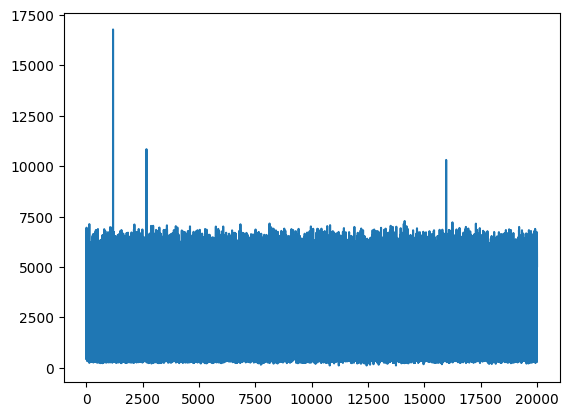

In [8]:
df['traffic_volume'].plot()

<Axes: >

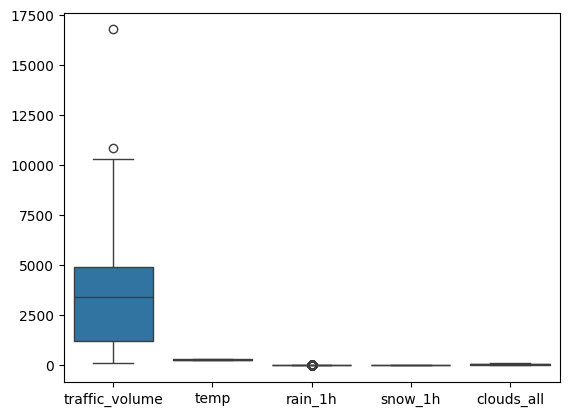

In [9]:
import seaborn as sns
sns.boxplot(data=df)


<Axes: >

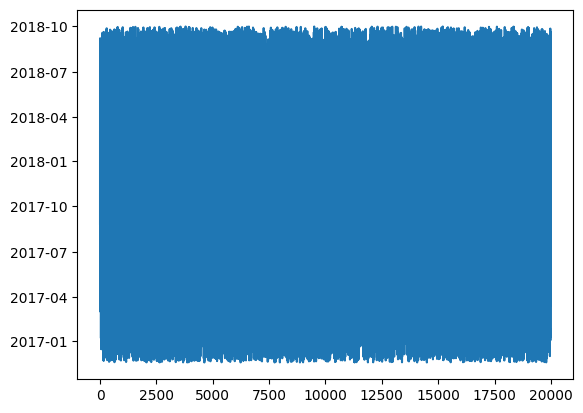

In [10]:
df['date_time'].plot()

<Axes: >

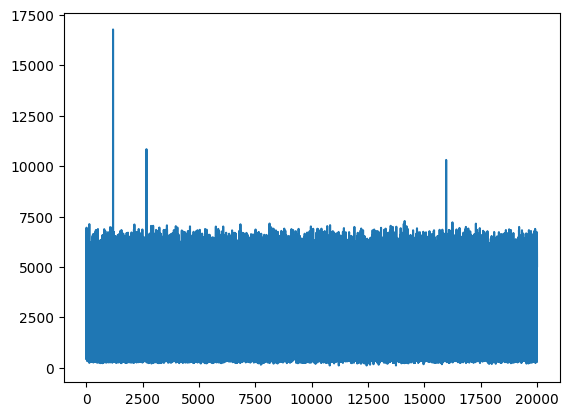

In [11]:
df['traffic_volume'].plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [12]:
for col in df.columns:
  print('name:',col,'value:',df[col].unique(),'null:',df[col].isnull().sum())
  print('///////')

name: traffic_volume value: [1209. 1248. 4602. ... 6742. 1783. 1132.] null: 20
///////
name: temp value: [291.15 286.01 293.69 ... 249.88 269.23 289.06] null: 0
///////
name: rain_1h value: [ 0.    0.25  1.78  2.79  0.44  2.26  0.28  1.86  1.02  4.    0.89  9.62
  5.08  1.15  3.05  3.45  2.85  4.79  1.82  5.42  1.85  5.19  2.62  1.52
  0.85  0.38  0.76  1.27  2.54 10.6   0.51  2.86  0.34  2.29  1.01  2.03
  2.16  1.1   3.1   3.94  5.84  0.69  1.14  1.4   1.66  1.68  3.4   2.48
  0.93  1.06  4.15  2.2   2.41  2.76  0.86  0.8   1.6   0.42  0.71  4.06
  0.61  0.81  0.43  0.98  1.72  1.21  7.11  0.3   2.88  0.29  0.32  2.61
  1.3   5.12  0.63  1.45  5.62  0.35  0.64  3.18  2.92  2.6   2.96  4.74
  1.65  3.3   0.66] null: 0
///////
name: snow_1h value: [0.] null: 0
///////
name: clouds_all value: [90  1 75  5 40 20  0  8 88 68 92 44 48 32 12 36 80 24 64 76 56] null: 0
///////
name: weather_main value: ['Mist' 'Clear' 'Clouds' 'Rain' 'Thunderstorm' 'Fog' 'Drizzle' 'Snow'
 'Haze' 'Smoke'] nul

In [13]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [14]:
df['traffic_volume'].fillna(df['traffic_volume'].rolling(window=3, min_periods=1).mean(),inplace=True)

In [15]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [16]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [17]:
df['prev_traffic_volume']=df['traffic_volume'].shift(1)

In [18]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0
...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0


In [19]:
df['prev_traffic_volume']=df['prev_traffic_volume'].fillna(0)

In [20]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,0.0
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0
...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0


In [21]:
df['difference'] = df['traffic_volume'].diff()


In [22]:
df['difference']=df['difference'].fillna(0)

In [23]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,difference
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,0.0,0.0
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,39.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,3354.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,-1764.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2956.0
...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,-3878.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,3172.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,-4763.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,4393.0


In [24]:
df['day']=df['date_time'].dt.day

In [25]:
df['minth']=df['date_time'].dt.month
df['year']=df['date_time'].dt.year

In [26]:
#df = df.set_index('date_time')


In [27]:
#df.sort_index()


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [28]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,difference,day,minth,year
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,0.0,0.0,27,8,2017
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,39.0,6,9,2018
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,3354.0,25,8,2017
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,-1764.0,9,11,2017
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2956.0,9,11,2017


In [29]:
df1=df['date_time']

In [30]:
df = df.set_index('date_time')


In [31]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,difference,day,minth,year
date_time,,,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,0.0,0.0,27,8,2017
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0,39.0,6,9,2018
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0,3354.0,25,8,2017
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,-1764.0,9,11,2017
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,2956.0,9,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,6601.0,-3878.0,6,6,2018
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2723.0,3172.0,25,10,2017
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,5895.0,-4763.0,28,3,2018


In [32]:
df1=df[['traffic_volume','temp','weather_main','day','minth','year']]

In [33]:
df1

,traffic_volume,temp,weather_main,day,minth,year
date_time,,,,,,
2017-08-27 01:00:00,1209.0,291.15,Mist,27,8,2017
2018-09-06 23:00:00,1248.0,286.01,Clear,6,9,2018
2017-08-25 18:00:00,4602.0,293.69,Clouds,25,8,2017
2017-11-09 22:00:00,2838.0,262.35,Clear,9,11,2017
2017-11-09 15:00:00,5794.0,267.08,Clear,9,11,2017
...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,Clouds,6,6,2018
2017-10-25 15:00:00,5895.0,285.58,Clouds,25,10,2017
2018-03-28 23:00:00,1132.0,275.30,Clear,28,3,2018


In [34]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
df1['weather_main']=enco.fit_transform(df1['weather_main'])


<ipython-input-34-143eaf1db68c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weather_main']=enco.fit_transform(df1['weather_main'])


In [35]:
df1

,traffic_volume,temp,weather_main,day,minth,year
date_time,,,,,,
2017-08-27 01:00:00,1209.0,291.15,5,27,8,2017
2018-09-06 23:00:00,1248.0,286.01,0,6,9,2018
2017-08-25 18:00:00,4602.0,293.69,1,25,8,2017
2017-11-09 22:00:00,2838.0,262.35,0,9,11,2017
2017-11-09 15:00:00,5794.0,267.08,0,9,11,2017
...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,1,6,6,2018
2017-10-25 15:00:00,5895.0,285.58,1,25,10,2017
2018-03-28 23:00:00,1132.0,275.30,0,28,3,2018


In [36]:
df1 = df1.sort_index()


In [37]:

train = df1.loc['2016-11-18 15:00:00':'2018-3-18 15:00:00']
val = df1.loc['2018-3-18 16:00:00':'2018-6-18 16:00:00']
test = df1.loc['2018-6-18 17:00:00':'2018-09-30 23:00:00']

In [38]:
train,val,test

(                     traffic_volume    temp  weather_main  day  minth  year
 date_time                                                                  
 2016-11-18 15:00:00          4872.0  274.08             8   18     11  2016
 2016-11-18 15:00:00          4872.0  274.08             3   18     11  2016
 2016-11-18 15:00:00          4872.0  274.08             5   18     11  2016
 2016-11-18 16:00:00          5074.0  273.84             3   18     11  2016
 2016-11-18 16:00:00          5074.0  273.84             5   18     11  2016
 ...                             ...     ...           ...  ...    ...   ...
 2018-03-18 11:00:00          4175.0  274.65             1   18      3  2018
 2018-03-18 12:00:00          4575.0  276.29             1   18      3  2018
 2018-03-18 13:00:00          4713.0  277.49             1   18      3  2018
 2018-03-18 14:00:00          4783.0  278.15             1   18      3  2018
 2018-03-18 15:00:00          4797.0  278.35             1   18      3  2018

In [39]:
train.isnull().sum()

,0
traffic_volume,0
temp,0
weather_main,0
day,0
minth,0
year,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#train,val,test
train_sc=scal.fit_transform(train)
val_sc=scal.fit_transform(val)
test_sc=scal.fit_transform(test)


In [41]:
train_sc,val_sc,test_sc

(array([[0.28551716, 0.48231966, 0.88888889, 0.56666667, 0.90909091,
         0.        ],
        [0.28551716, 0.48231966, 0.33333333, 0.56666667, 0.90909091,
         0.        ],
        [0.28551716, 0.48231966, 0.55555556, 0.56666667, 0.90909091,
         0.        ],
        ...,
        [0.27597792, 0.53591073, 0.11111111, 0.56666667, 0.18181818,
         1.        ],
        [0.28017759, 0.5462832 , 0.11111111, 0.56666667, 0.18181818,
         1.        ],
        [0.28101752, 0.54942637, 0.11111111, 0.56666667, 0.18181818,
         1.        ]]),
 array([[0.45048238, 0.36691789, 0.11111111, 0.56666667, 0.        ,
         0.        ],
        [0.4428037 , 0.36830623, 0.11111111, 0.56666667, 0.        ,
         0.        ],
        [0.36591849, 0.36969457, 0.11111111, 0.56666667, 0.        ,
         0.        ],
        ...,
        [0.47095885, 0.71241571, 0.55555556, 0.56666667, 1.        ,
         0.        ],
        [0.53228982, 0.72669576, 0.11111111, 0.56666667, 1.   

In [42]:
train_sc,val_sc,test_sc
df_train=pd.DataFrame(train_sc, columns=train.columns)
df_val=pd.DataFrame(val_sc, columns=val.columns)
df_test=pd.DataFrame(test_sc, columns=test.columns)

In [43]:
df_train,df_val,df_test

(       traffic_volume      temp  weather_main       day     minth  year
 0            0.285517  0.482320      0.888889  0.566667  0.909091   0.0
 1            0.285517  0.482320      0.333333  0.566667  0.909091   0.0
 2            0.285517  0.482320      0.555556  0.566667  0.909091   0.0
 3            0.297636  0.478548      0.333333  0.566667  0.909091   0.0
 4            0.297636  0.478548      0.555556  0.566667  0.909091   0.0
 ...               ...       ...           ...       ...       ...   ...
 14221        0.243701  0.491278      0.111111  0.566667  0.181818   1.0
 14222        0.267699  0.517052      0.111111  0.566667  0.181818   1.0
 14223        0.275978  0.535911      0.111111  0.566667  0.181818   1.0
 14224        0.280178  0.546283      0.111111  0.566667  0.181818   1.0
 14225        0.281018  0.549426      0.111111  0.566667  0.181818   1.0
 
 [14226 rows x 6 columns],
       traffic_volume      temp  weather_main       day  minth  year
 0           0.450482  0.3

In [45]:
from keras.utils import timeseries_dataset_from_array

In [46]:
import tensorflow as tf

In [47]:
win = 24
xy_train = tf.keras.utils.timeseries_dataset_from_array(df_train, targets= df_train.iloc[win:, -1], sequence_length=win)
xy_val = tf.keras.utils.timeseries_dataset_from_array(df_val, targets= df_val.iloc[win:, -1], sequence_length=win)
xy_test = tf.keras.utils.timeseries_dataset_from_array(df_test, targets= df_test.iloc[win:, -1], sequence_length=win)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [48]:
# on tope

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [49]:
import keras
from keras import layers

In [50]:
from keras import Sequential

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [51]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU


In [52]:
GUR_model1 = Sequential([
    GRU(10, activation='tanh', return_sequences=True),
    GRU(8, activation='tanh'),
    Dense(8, activation='relu'),
    Dense(1, activation='relu'),
])

GUR_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
GUR_model1.compile(
    loss='mse',
    optimizer="Adam",
    metrics=["mse"],
)

In [54]:

gru_hist=GUR_model1.fit(
    xy_train, validation_data=xy_val, epochs=50
)

Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [55]:
gru_predictions = GUR_model1.predict(xy_test)
gru_predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [56]:
  import numpy as np

  features = []
  values = []

  for batch in xy_test:
    x, y = batch
    features.append(x.numpy())
    values.append(y.numpy())

  features = np.concatenate(features, axis=0)
  values = np.concatenate(values, axis=0)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mean_absolute_error(values, gru_predictions)


0.0

In [70]:
mean_squared_error(values, gru_predictions)


0.0

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [59]:
LSTM_model1 = Sequential([
    LSTM(10, activation='tanh', return_sequences=True),
    LSTM(8, activation='tanh'),
    Dense(8, activation='relu'),
    Dense(1, activation='relu'),
])

LSTM_model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
LSTM_model1.compile(
    loss='mse',
    optimizer="Adam",
    metrics=["mse"],
)

In [61]:
LSTM_model=LSTM_model1.fit(
    xy_train, validation_data=xy_val, epochs=20
)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.0000e+00 - val

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [64]:
STML_predictions = LSTM_model1.predict(xy_test)
STML_predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [68]:
mean_absolute_error(values, STML_predictions)


0.0

In [71]:
mean_squared_error(values, STML_predictions)


0.0

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [ ]:
#Data Preprocessing: I fall null with use rolling because of it give us the mean for the last 6 row
#Feature Engineering: I creat 3 columns from the date column for the day and month and day he give the model more featurs for predect
#Model Architecture: i chose this 2 models because i use it in mini project and its the best model
#Training Process: i Traid same difrint size
#Loss Function and Metrics: I use  mean_absolute_error and mean_squared_error and he is give same value i think i have error in the value
#Model Tuning (If Done): I chose the indow size 24 for become evry day
#Overfitting and Underfitting: Overfitting , make the train data more complacx
#Future Improvements: I need Improvements Evaluation